# Author: Jose Garcia

In [ ]:
from matplotlib import pyplot as plt
import cv2
import glob
import random
%matplotlib 

In [2]:
# How OpenCV manages images?

# Images are just arrays, let's see the first four rows of an image array
image = cv2.imread("images/hog_intro/DSCN0098.jpg")
image[0:4]


array([[[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]],

       [[ 16,  11,  12],
        [ 17,  12,  13],
        [ 17,  12,  13],
        ...,
        [208, 208, 208],
        [208, 208, 208],
        [208, 208, 208]]], dtype=uint8)

What did I print? What those numbers mean?

Most of the computers interpret an image as an array of color representation of 8 bits, this means, a number between 0 and 255. What you see in the last print statemen is this representation splitted into three different color channels: Red, Green and Blue, represented by a matrix that stores the pixels color representation of the image, this is what your computer 'sees' and that is why artificial vision applications requires some of math to be developed. For our fortune, OpenCV treats with it for us !!

<img src="images/teach/image_representation.png">

<hr>

The vectors inside our arrays represents the colors in a 8-bit resolution
<div style="width:200px;overflow:hidden">
    <div style="background-color:red;height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Pure Red [255, 0, 0]
    </div>
</div>

<div style="width:400px;overflow:hidden">
    <div style="background-color:rgb(255,255,0);height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Mix of Red and Green [255, 255, 0]
    </div>
</div>

<div style="width:400px;overflow:hidden">
    <div style="background-color:rgb(0,127,127);height:10px;width:10px;display:inline-block">
    </div>
    <div style="display:inline-block">
        Attenuate mix of Green and Blue [0, 127, 127]
    </div>
</div>

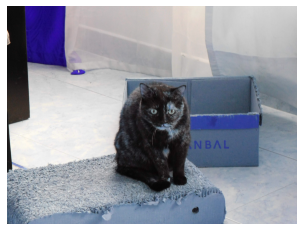

In [3]:
# Let's show the image to see how this array 'looks'
%matplotlib inline

plt.axis('off')
plt.imshow(image)
plt.show()

Why the first signal is plotted in a 'strange' way?

Images are treated as an array of three channels: Red, Green and Blue. Opencv treats with them as BGR while matplot treats with them as RGB.

Let's solve this

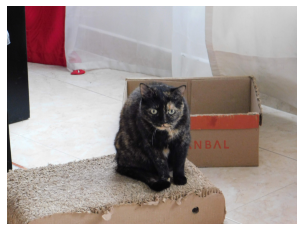

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

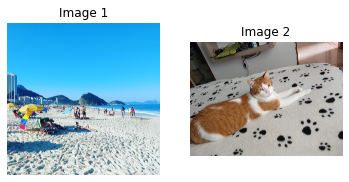

In [8]:
# let's plot other images

def retrieve_img_file_paths(path, img_format="jpg"):
    return glob.glob("{}/*.{}".format(path, img_format), recursive=True)

paths = retrieve_img_file_paths("images/hog_intro")

images = random.choices(paths, k=2)

plt.subplot(121)
plt.axis('off')
plt.title('Image 1')
plt.imshow(cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.axis('off')
plt.title('Image 2')
plt.imshow(cv2.cvtColor(cv2.imread(images[1]), cv2.COLOR_BGR2RGB))

In [10]:
# Images also has width and height

image_1 = cv2.imread(images[0])
image_2 = cv2.imread(images[1])
print(image_1.shape, image_2.shape)

(3024, 3024, 3) (3024, 4032, 3)


## Grayspace Images

From our previous job, we know that an image is represented as a RGB matrix, but to process a three columns matrix can be computationally costly and because of this many applications transforms the image in a vector array of 'gray' pixels intensities.

Be careful, a grayscale space vector does not mean black or white, it is a new representation of the RGB space:

Y = 0.299 x R + 0.587 x G + 0.114 x B

due to the cones and receptors in our eyes, we are able to perceive nearly 2x the amount of green than red. And similarly, we notice over twice the amount of red than blue. Thus, we make sure to account for this when converting from RGB to grayscale.

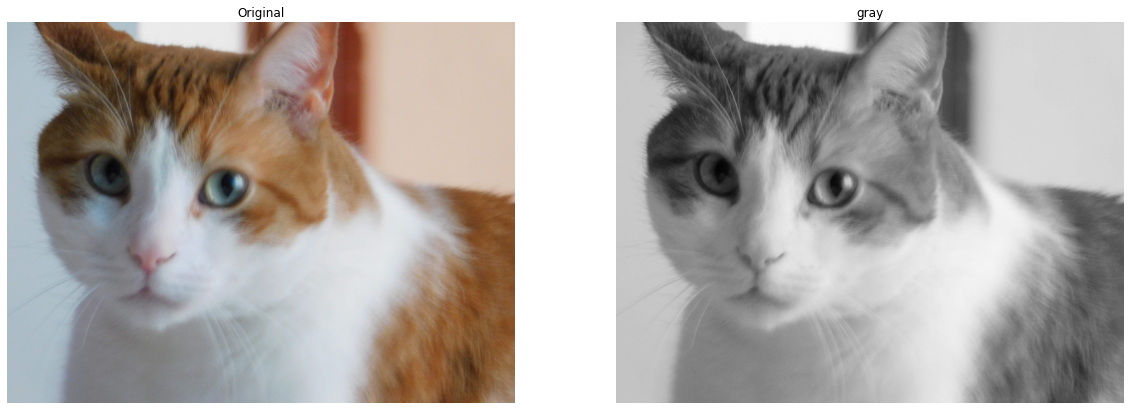

In [11]:
# Gray Scale Images

image = cv2.imread("images/hog_intro/DSCN0129.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')

In [13]:
# Gray Scale images are just vectors, not arrays!!!!!

gray[0:4]

array([[182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198],
       [182, 182, 182, ..., 198, 198, 198]], dtype=uint8)

## Image histogram

Histograms capture the frequency distribution of a set of data. From [pyimagsearch blog](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/):  
"A histogram represents the distribution of pixel intensities (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255"

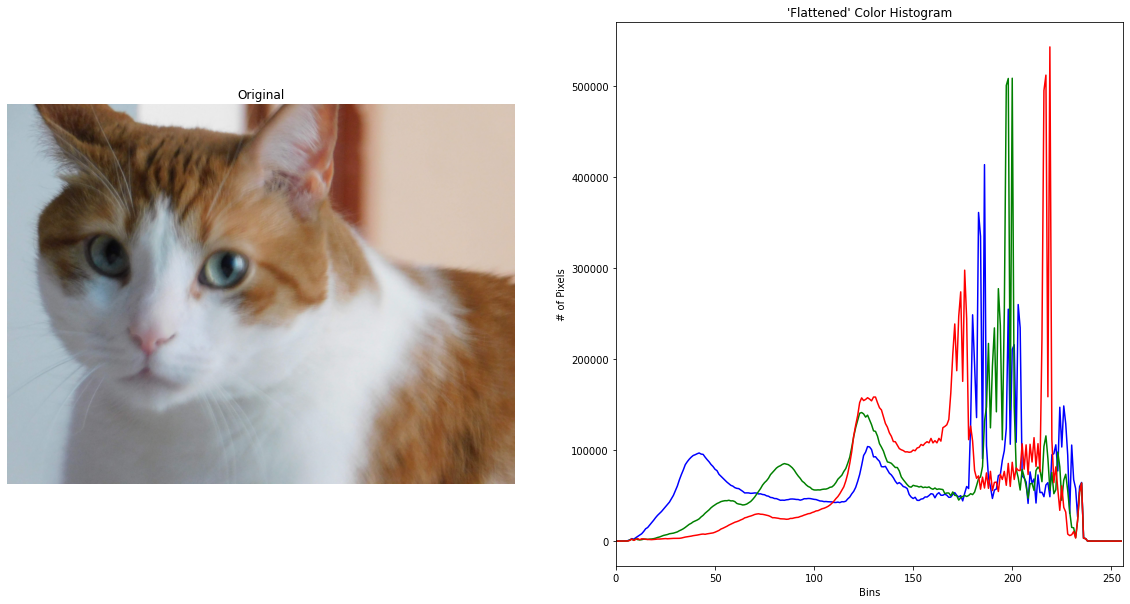

In [21]:
image = cv2.imread("images/hog_intro/DSCN0129.jpg")
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

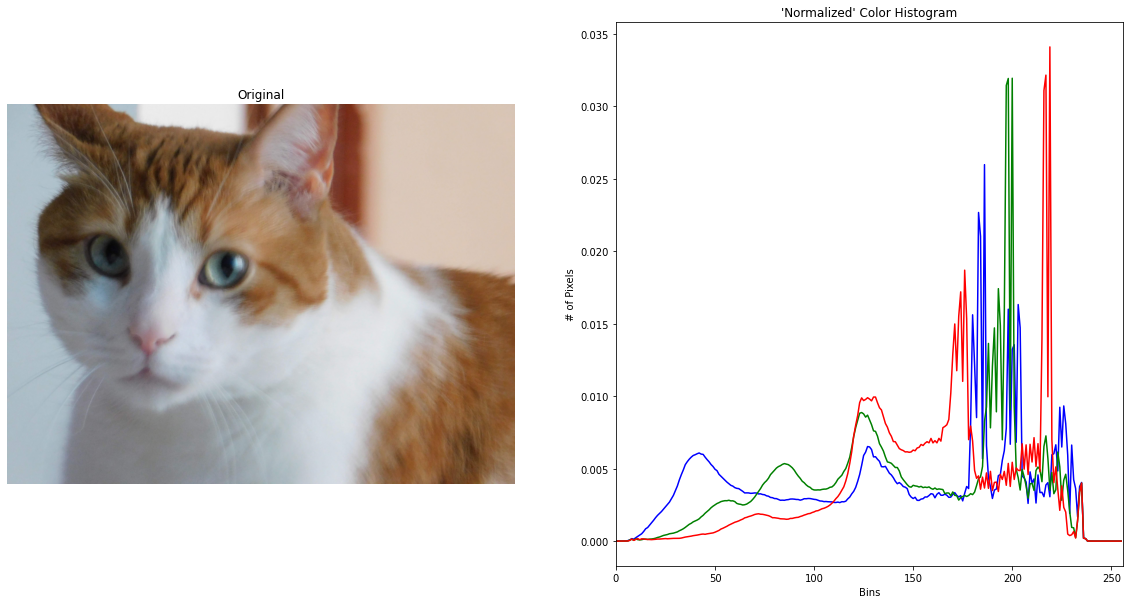

In [23]:
image = cv2.imread("images/hog_intro/DSCN0129.jpg")
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Normalized' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

(0.0, 256.0)

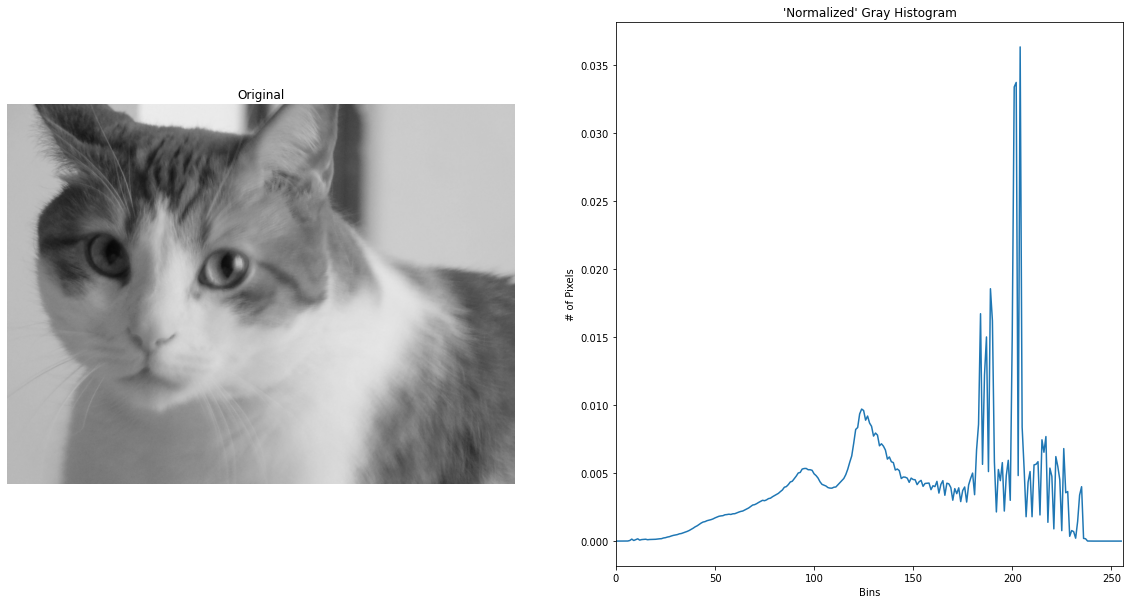

In [24]:
# Histograms in gray images
image = cv2.imread("images/hog_intro/DSCN0129.jpg", 0)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)

plt.title("'Normalized' Gray Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
 
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist / hist.sum()
plt.plot(hist)
plt.xlim([0, 256])

## Training our First detector

Now that we know the basics about digital images treatment using OpenCV and how histograms works, let's dive into the generalities to train our custom detector